## DAB200 -- Lab 4

In this lab, you will gain some experience in dealing with missing data and further practice converting non-numeric features in a dataset to numeric.

**Target**: to predict `Comb Unadj FE - Conventional Fuel`

**Data set**: make sure you use the data assigned to your group!

| Groups | Data set |
| :-: | :-: |
| 1-3 | veh14_missing.csv |
| 4-6 | veh15_missing.csv |
| 7-9 | veh16_missing.csv |
| 10-12 | veh17_missing.csv |
| 13-15 | veh18_missing.csv |
| 16-18 | veh19_missing.csv |

**Important Notes:**
- Use [Chapter 7](https://mlbook.explained.ai/bulldozer-intro.html) of the textbook as a **guide**:
     - you only need to use **random forest** models;
- Code submitted for this lab should be:
     - error free
         - to make sure this is the case, before submitting, close all Jupyter notebooks, exit Anaconda, reload the lab notebook and execute all cells
     - final code
         - this means that I don't want to see every piece of code you try as you work through this lab but only the final code; only the code that fulfills the objective
- Use the **out-of-bag score** to evaluate models
     - Read Section 5.2 carefully so that you use this method properly
     - The oob score that you provide should be the average of 10 runs
- Don't make assumptions!


### Part 0

Please provide the following information by editing this cell:
 - Group Number: 17 
 - Group Members: Aashutosh Sehgal (0780170), Saheb Singh Bhatia (0781209)

### Part 1 - Create and evaluate an initial model

In this part you should: 
 - use Section 7.3 of the textbook as a guide, except:
     - use all of the data; and
     - use 150 decision trees in your random forest models
 - read in the data
 - isolate all numeric features from original data set
 - fill in any missing values with 0
 - create and evaluate a baseline model 

#### Code (10 marks)

**Replace the value of `data_string` with the data for your group. Do not use the full path; only the name of the data.csv**. You won't need a full path if you put your csv file in the same folder where you put this notebook

In [1]:
data_string = 'veh19_missing.csv'

**Code for reading data:**

In [2]:
# Importing all libraries and reading data from csv file.
# Using info() method to look at columns, their datatypes and NULL vales etc.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import category_encoders as ce
from rfpimp import *

veh = pd.read_csv(data_string)

**Code for exploring data:**

In [3]:
veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Eng Displ                          1070 non-null   float64
 1   # Cyl                              1270 non-null   int64  
 2   Comb Unadj FE - Conventional Fuel  1270 non-null   float64
 3   # Gears                            1270 non-null   int64  
 4   Max Ethanol % - Gasoline           1240 non-null   float64
 5   Intake Valves Per Cyl              1270 non-null   int64  
 6   Exhaust Valves Per Cyl             1270 non-null   int64  
 7   Lockup Torque Converter            1270 non-null   object 
 8   Carline Class Desc                 1270 non-null   object 
 9   Oil Viscosity                      1270 non-null   object 
 10  Calc Approach Desc                 1270 non-null   object 
 11  Label Recalc?                      1197 non-null   objec

In [4]:
def explore_df(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('data type')

In [5]:
explore_df(veh)

,data type,percent missing,No. unique,unique values
# Cyl,int64,0.000000,8,"[4, 6, 8, 12, 3, 10, 16, 5]"
# Gears,int64,0.000000,8,"[1, 5, 8, 9, 6, 10, 7, 4]"
Intake Valves Per Cyl,int64,0.000000,2,"[2, 1]"
Exhaust Valves Per Cyl,int64,0.000000,2,"[2, 1]"
Eng Displ,float64,15.748031,46,"[1.8, 2.0, 3.0, 1.4, nan, 6.0, 4.0, 4.3, 3.5, ..."
Comb Unadj FE - Conventional Fuel,float64,0.000000,1025,"[43.1256, 35.352, 34.2607, 25.422, 40.4989, 22..."
Max Ethanol % - Gasoline,float64,2.362205,4,"[15.0, 10.0, nan, 85.0]"
Lockup Torque Converter,object,0.000000,2,"[Y, N]"
Carline Class Desc,object,0.000000,18,"[not provided, Two Seaters, Standard SUV 4WD, ..."
Oil Viscosity,object,0.000000,80,"[0W-20, GF-5 0W-20, ##-##, 5W30 DC225.10, 0W20..."


#### Create and evaluate a baseline model after isolating numeric features:
Put all your code inside the function below. After your code is entered, running the function below must return the mean oob score. Do not provide any arguments to the function. You can **optionally** define other function(s) inside this function and also use them. 

The following function must return:
- **first item:** Mean OOB score of 10 runs
- **second item:** The last (i.e., the 10th) random forest regressor object (fitted)
- **third item:** Feature array
- **fourth item:** Target array

In [6]:
# Keeping only the numerical fields from the data.

numfeatures = ['Eng Displ', '# Cyl', '# Gears', 'Max Ethanol % - Gasoline','Intake Valves Per Cyl','Exhaust Valves Per Cyl','Comb Unadj FE - Conventional Fuel']
veh_num = veh[numfeatures]
veh_num.head(5)

,Eng Displ,# Cyl,# Gears,Max Ethanol % - Gasoline,Intake Valves Per Cyl,Exhaust Valves Per Cyl,Comb Unadj FE - Conventional Fuel
0,1.8,4,1,15.0,2,2,43.1256
1,2.0,4,5,15.0,2,2,35.3520
2,2.0,4,8,15.0,2,2,34.2607
3,3.0,6,9,10.0,2,2,25.4220
4,1.4,4,5,10.0,2,2,40.4989


In [7]:
# Splitting the dataset into training and testing.
# The random_state hyperparameter is used to keep the split similar each time and so that it does not affect r2 and oob scores.
# Creating empty list to append values of the OOB Scores.

def estimate_mean_oob_score_baseline():
    X = veh_num.drop('Comb Unadj FE - Conventional Fuel', axis=1)
    y = veh_num['Comb Unadj FE - Conventional Fuel']
    X=X.fillna(0)
    oob_scores = []
    for i in range(10):
        rf = RandomForestRegressor(n_estimators=150, n_jobs=-1, oob_score=True) 
        rftd = rf.fit(X, y)
        oob_scores.append(rf.oob_score_)
    return np.mean(oob_scores),rftd,X,y

**Running the following cell should not throw any error if your code in the cell above is correct.  Do not edit the following cell.**

In [8]:
baseline_oob_score, rf, X, y = estimate_mean_oob_score_baseline()

num_trees = len(rf.estimators_)

print(baseline_oob_score, num_trees)

if data_string == 'veh14_missing.csv':
    output = 0.696
elif  data_string == 'veh15_missing.csv':
    output = 0.730
elif  data_string == 'veh16_missing.csv':
    output = 0.738
elif  data_string == 'veh17_missing.csv':
    output = 0.721
elif  data_string == 'veh18_missing.csv':
    output = 0.673
elif  data_string == 'veh19_missing.csv':
    output = 0.704
    

if (np.isclose(baseline_oob_score , output, rtol = 0.01) == True) and (num_trees==150):
    part1_marks = 10
    
assert np.isclose(baseline_oob_score , output, rtol = 0.01)

0.70316107749799 150


**Show Importances:**

In [9]:
I = importances(rf, X, y, features= list(X.columns))
I

,Importance
Feature,
# Cyl,0.797808
Eng Displ,0.383477
# Gears,0.191330
Max Ethanol % - Gasoline,0.177621
Intake Valves Per Cyl,0.000980
Exhaust Valves Per Cyl,0.000383


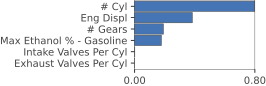

In [10]:
# Looking at feature importance plot.

plot_importances(I, color='#4575b4')

### Part 2 - Normalize missing values

In this part you should: 
 - use Section 7.4 of the textbook as a guide
 - convert **all** representations of missing data to a **single** representation
 
#### Code (15 marks)

**Code for exploring missing values:**

In [11]:
del veh['Intake Valves Per Cyl']
del veh['Exhaust Valves Per Cyl']

In [12]:
veh_num.nunique(dropna=False)

Eng Displ                              46
# Cyl                                   8
# Gears                                 8
Max Ethanol % - Gasoline                4
Intake Valves Per Cyl                   2
Exhaust Valves Per Cyl                  2
Comb Unadj FE - Conventional Fuel    1025
dtype: int64

In [13]:
# Looking at the unique values stored in each numerical column.

for col in veh_num:
    print(veh_num[col].unique())

[1.8 2.  3.  1.4 nan 6.  4.  4.3 3.5 5.2 1.6 6.2 2.5 4.4 3.6 2.4 5.5 1.5
 6.4 2.8 5.  2.3 2.7 3.8 5.3 5.6 6.6 3.2 5.7 4.6 1.3 1.2 3.3 6.7 6.3 2.9
 1.  3.9 4.7 3.4 4.2 3.7 8.  2.2 6.5 6.8]
[ 4  6  8 12  3 10 16  5]
[ 1  5  8  9  6 10  7  4]
[15. 10. nan 85.]
[2 1]
[2 1]
[43.1256 35.352  34.2607 ... 26.2121 38.4679 24.1063]


**Code for normalizing missing values:**

In [14]:
from pandas.api.types import is_string_dtype, is_object_dtype
def normalize_missing_values():
    missing_vals = ['not provided', '##-##', '   ', 'none', 'not filled in', '^^', 'unknown', 'XXXXX', 
                'not specified', '*****', '@@@@@', 'none given', '%%%%%', 'missing', 'mod']
    for col in veh.columns:
        if is_string_dtype(veh[col]) or is_object_dtype(veh[col]):
            veh[col] = veh[col].str.lower()
            veh[col] = veh[col].fillna(np.nan) 
            veh[col] = veh[col].replace(missing_vals, np.nan)
    return veh

**Running the following cell should not throw any error if your code in the cell above is correct.  Do not edit the following cell.**

In [15]:
df = normalize_missing_values()

missing_vals = ['not provided', '##-##', '   ', 'none', 'not filled in', '^^', 'unknown', 'XXXXX', 
                'not specified', '*****', '@@@@@', 'none given', '%%%%%', 'missing', 'mod']

col_missing = []

for col in df.columns:
    col_missing.append(all(df[col].isin(missing_vals)))
    
if sum(col_missing) == 0:
    part2_marks = 15
else:
    part2_marks = 0
    
assert sum(col_missing) == 0

### Part 3 - Categorical features

In this part you should: 
 - use Section 7.5.1 as a guide
 - only use ordinal encoding 
 - convert **all** non-numeric features to numeric 
 - handle any missing values
 
#### Code (25 marks)

**Provide your code to convert all non-numeric features to numeric using ordinal encoding. Use `pandas` for ordinal encoding. Make sure that missing values are encoded as zero. Do not provide any arguments to the function below. All your code must be inside the function below**

In [16]:
# Sperating categorical fields.

nonnum = [col for col in veh.columns.tolist() if col not in numfeatures + ['Comb Unadj FE - Conventional Fuel']]
veh_nonnum = veh[nonnum]

In [17]:
# Looking at number of unique values in each categorical column.

veh_nonnum.nunique(dropna=False)

Lockup Torque Converter     2
Carline Class Desc         18
Oil Viscosity              77
Calc Approach Desc          4
Label Recalc?               3
dtype: int64

In [18]:
# Looking at the unique values stored in each categorical column.

for col in veh_nonnum:
    print(veh_nonnum[col].unique())

['y' 'n']
[nan 'two seaters' 'standard suv 4wd' 'minicompact cars' 'subcompact cars'
 'special purpose vehicle cab chassis' 'standard pick-up trucks 4wd'
 'midsize cars' 'compact cars' 'small suv 4wd' 'small suv 2wd'
 'standard suv 2wd' 'vans, passenger type'
 'special purpose vehicle, minivan 2wd' 'standard pick-up trucks 2wd'
 'special purpose vehicle 2wd' 'special purpose vehicle 4wd'
 'special purpose vehicle, minivan 4wd']
['0w-20' 'gf-5 0w-20' nan '5w30 dc225.10' '0w20' '5w40' '5w30'
 'sae 5w-30 api sn plus' 'sae 0w-20 api sn' '0w-40' '0w40' 'gf-5 5w-30'
 '5w20 gf4' 'gf-5 0w20' '5w30 / 225.10' '5w-30 and 0w-40' '0w-16'
 '5w40 vw 50200' '5w-20' '5w20 api or ilsac gf-4' '5w20' '5w-30'
 '5w-30 api sn plus' '5w30 api sn plus' 'sae 0w-20' '5w30/acea a5'
 '5w-30 / api sn plus' 'sae 5w20' '5w30 / api sn plus' 'sae 5w-30'
 '0w20 vw50400' 'sae 5w-20 / api sn plus' '5w20 api or gf-4' '5w20 api sm'
 'sae 5w-30 / api sn plus' 'sae 5w/40 api sl/cf' '5w-30 api sn+'
 '0w-20 vw50800' 'sae 5w-20'

In [19]:
def ordinal_encoding_non_numeric_cols():
    X = veh
    encoder = ce.OrdinalEncoder(cols=nonnum)
    encoder.fit(X)
    X = encoder.transform(X)
    return X

**Running the following cell should not throw any error if your code in the cell above is correct.  Do not edit the following cell.**


In [20]:
df = ordinal_encoding_non_numeric_cols()

from pandas.api.types import is_numeric_dtype

cols_are_numeric = []
for col in df.columns:
    if col != 'Comb Unadj FE - Conventional Fuel':
        cols_are_numeric.append(is_numeric_dtype(df[col]))
    
    
if (df.shape[1]) - 1 == sum(cols_are_numeric):
    part3_marks = 25
else:
    part3_marks = 0
    
assert (df.shape[1]) - 1 == sum(cols_are_numeric)

### Part 4 - Numeric features

In this part you should: 
 - use Section 7.5.2 as a guide
 - handle any missing values
 
#### Code (30 marks)

In [21]:
def fill_missing_vals_num():
    veh['Max Ethanol % - Gasoline'+'_na'] = pd.isnull(veh['Max Ethanol % - Gasoline'])
    veh['Max Ethanol % - Gasoline'].fillna(veh['Max Ethanol % - Gasoline'].median(), inplace=True)
    veh['Eng Displ'+'_na'] = pd.isnull(veh['Eng Displ'])
    veh['Eng Displ'].fillna(veh['Eng Displ'].median(), inplace=True)
    return veh

**Running the following cell should not throw any error if your code in the cell above is correct. Do not edit the following cell.**

In [22]:
df = fill_missing_vals_num()

cols_not_null = []
for col in df.columns:
    cols_not_null.append(sum(pd.isnull(df[col])))
    
if all(cols_not_null) == 0:
    part4_marks = 30
else:
    part4_marks = 0
    
assert all(cols_not_null) == 0

### Part 5 - Create and evaluate a final model

In this part you should:
 - create and evaluate a model using all the features after processing them in Parts 2, 3, and 4 above 
 - use 150 decision trees
 
The following function must return:
- **first item:** Mean OOB score of 10 runs
- **second item:** The last (i.e., the 10th) random forest regressor object (fitted)
- **third item:** Feature array
- **fourth item:** Target array

#### Code (10 marks)

In [23]:
veh = normalize_missing_values()
veh = ordinal_encoding_non_numeric_cols()
veh = fill_missing_vals_num()

In [24]:
def estimate_mean_oob_score_final():
    oob_scores = []
    X = veh.drop('Comb Unadj FE - Conventional Fuel', axis=1)
    y = veh['Comb Unadj FE - Conventional Fuel']
    for i in range(10):
        rf = RandomForestRegressor(n_estimators=150, n_jobs=-1, oob_score=True) 
        rftd=rf.fit(X, y)
        oob_scores.append(rf.oob_score_)
    return np.mean(oob_scores),rftd,X,y

In [25]:
final_oob_score, rf, X, y = estimate_mean_oob_score_final()

num_trees = len(rf.estimators_)

print(final_oob_score, num_trees)

if final_oob_score > baseline_oob_score:
    part5_marks = 10
else:
    part5_marks = 0
    
assert final_oob_score > baseline_oob_score

0.8511057783491542 150


**Show importances:**

In [26]:
I = importances(rf, X, y, features= list(X.columns))
I

,Importance
Feature,
# Cyl,9.151976e-01
Eng Displ,3.095658e-01
Calc Approach Desc,2.256740e-01
# Gears,1.716307e-01
Oil Viscosity,1.555409e-01
Lockup Torque Converter,1.048348e-01
Carline Class Desc,8.747065e-02
Max Ethanol % - Gasoline,6.043628e-02
Label Recalc?,1.163010e-02


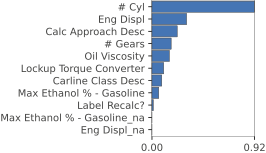

In [27]:
# Looking at feature importance plot.

plot_importances(I, color='#4575b4')

### Part 6 - Lab Viva

**Following questions and / or other questions will be asked to every student during the live session for viva:**

- How was "missing" data represented?
- Calculate the percent difference between baseline and final model scores
- What does the importances plot show for the final model?
- For numeric columns, what did you replace the missing values with? Why?
- Can missing values be predictive? Give an example.


#### (10 marks)

Missing data were represented as 'not provided', '##-##', '   ', 'none', 'not filled in', '^^', 'unknown', 'XXXXX', 
'not specified', '*****', '@@@@@', 'none given', '%%%%%', 'missing', 'mod'.

In [28]:
((final_oob_score-baseline_oob_score) / final_oob_score) * 100

17.382645567055715

Importance plots shows that 'Label Recalc?', 'Max Ethanol % - Gasoline_na' and 'Eng Displ_na' can be removed as they have almost no significance in random forest model.

In numerical columns the missing valeues is replaced with median as it is less sensitive to outliers and thus we have used median instead of means.

No they cannot be predictive as they can create misconception while fitting the data to the model and add noise thus we can either remove to handle them appropriately in order to make our model better as we can see in above model the baseline model had 0.7035 OOB score whereas after cleaning and handling missing values we created a better model with 0.8526 OOB score.

In [29]:
parts_1_to_5_marks = part1_marks + part2_marks + part3_marks + part4_marks + part5_marks
parts_1_to_5_marks

# part6_marks =


total_marks = parts_1_to_5_marks #+ part6_marks
total_marks

90